Мышковец С.А., v.01 30.10.2022

Решение задачи: Построить модель машинного обучения для предсказания вероятности того, что клиент уйдет в просрочку более 60 дней (delinq60plus).

В данной задаче нам представлены данные в которых ключевое поле — это то, просрочит ли клиент микро-финансовой организации выплату более чем на 60 дней или нет. 

Задачи:
1.  осуществить корректную загрузку данных
2.  осуществить разведывательный анализ данных:
- разбить выборку на обучающую и тестовую
- проанализировать пропуски и решить, что с ними делать
- удалить дубликаты
- проанализировать выбросы
- создать/ удалить переменные
- закодировать категориальные переменные
- нормализовать числовые переменные (при необходимости)
3. построить модель и оценить ее качество
4. при необходимости вернуться к предыдущим шагам, чтобы улучшить качество модели


Использовать (не везде, а где мы работаем с данными напрямую) SQL запросы. 


Вывод: 


# 1. Осуществить корректную загрузку данных

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 50)
df = pd.read_csv("MFOcredit.csv", sep= ';')

In [2]:
df.head()

,id,date_start,date_end,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus
0,1,03-Jan-2013,12-Jan-2013,Мужской,44,Нет,Собственное,Гражданский брак/женат/замужем,Нет,Официальное,Новосибирская область,Нет,Да,Нет
1,2,03-Jan-2013,17-Jan-2013,Мужской,21,Пропуск поля,Живут с родителями,Холост,Нет,Официальное,Кемеровская область юг,Да,Нет,Нет
2,3,03-Jan-2013,17-Jan-2013,Мужской,25,Пропуск поля,Собственное,Холост,Да,Официальное,Кемеровская область север,Пропуск поля,Нет,Нет
3,4,03-Jan-2013,17-Jan-2013,Женский,47,Пропуск поля,Собственное,Гражданский брак/женат/замужем,Да,Официальное,Кемеровская область север,Нет,Нет,Нет
4,5,03-Jan-2013,17-Jan-2013,Мужской,22,Нет,Арендуемое,Гражданский брак/женат/замужем,Нет,Официальное,Кемеровская область север,Да,Да,Нет


# 2. Осуществить разведывательный анализ данных:

## Разбить выборку на обучающую и тестовую

In [3]:
from sklearn.model_selection import train_test_split

y = df.delinq60plus
X = df.drop(['delinq60plus'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=42, 
                                                    stratify=y)

In [4]:
X_train.head()

,id,date_start,date_end,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children
7929,7930,06-May-2013,20-May-2013,Мужской,27,Пропуск поля,Собственное,Пропуск поля,Нет,Пропуск поля,Кемеровская область юг,Пропуск поля,Пропуск поля
27978,27979,25-Nov-2013,09-Dec-2013,Мужской,63,Пропуск поля,Пропуск поля,Пропуск поля,Да,Пропуск поля,Кемеровская область юг,Пропуск поля,Нет
8016,8017,07-May-2013,05-Jun-2013,Женский,21,Нет,Собственное,Холост,Нет,Официальное,Алтайский край,Нет,Нет
29404,29405,04-Dec-2013,18-Dec-2013,Мужской,27,Нет,Долевая собственность,Гражданский брак/женат/замужем,Да,Официальное,Кемеровская область юг,Да,Нет
29339,29340,04-Dec-2013,13-Dec-2013,Женский,57,Нет,Муниципальное,Холост,Да,Официальное,Новосибирская область,Да,Нет


In [5]:
y_train

7929      Да
27978    Нет
8016      Да
29404    Нет
29339    Нет
        ... 
26418    Нет
27807    Нет
1216     Нет
11556     Да
9748      Да
Name: delinq60plus, Length: 24648, dtype: object

# Проанализировать пропуски и решить, что с ними делать

In [6]:
X_train.describe()

,id,age
count,24648.000000,24648.000000
mean,17549.811303,37.235922
std,10187.991175,13.194979
min,1.000000,18.000000
25%,8678.750000,26.000000
50%,17534.500000,34.000000
75%,26363.250000,48.000000
max,35212.000000,75.000000


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24648 entries, 7929 to 9748
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          24648 non-null  int64 
 1   date_start  24648 non-null  object
 2   date_end    24648 non-null  object
 3   gender      24648 non-null  object
 4   age         24648 non-null  int64 
 5   auto        24648 non-null  object
 6   housing     24648 non-null  object
 7   marstatus   24648 non-null  object
 8   regclient   24648 non-null  object
 9   jobtype     24648 non-null  object
 10  region      24648 non-null  object
 11  credits     24648 non-null  object
 12  children    24648 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.6+ MB


In [8]:
X_train.isna().sum()

id            0
date_start    0
date_end      0
gender        0
age           0
auto          0
housing       0
marstatus     0
regclient     0
jobtype       0
region        0
credits       0
children      0
dtype: int64

**Пропусков, NaN и нулевых значений в БД нет.**

In [9]:
X_train.groupby("gender")["id"].count().sort_values()

gender
Мужской    11822
Женский    12826
Name: id, dtype: int64

In [10]:
X_train.groupby("auto")["id"].count().sort_values()

auto
Да               2583
Пропуск поля     9788
Нет             12277
Name: id, dtype: int64

In [11]:
X_train.groupby("housing")["id"].count().sort_values()

housing
Муниципальное              958
Арендуемое                1414
Долевая собственность     2080
Живут с родителями        2236
Пропуск поля              5303
Собственное              12657
Name: id, dtype: int64

In [12]:
X_train.groupby("marstatus")["id"].count().sort_values()

marstatus
Вдова/вдовец                      1284
Разведен                          2000
Пропуск поля                      5291
Холост                            6177
Гражданский брак/женат/замужем    9896
Name: id, dtype: int64

In [13]:
X_train.groupby("regclient")["id"].count().sort_values()

regclient
Нет    10870
Да     13778
Name: id, dtype: int64

In [14]:
X_train.groupby("jobtype")["id"].count().sort_values()

jobtype
Неофициальное      812
Пропуск поля     10141
Официальное      13695
Name: id, dtype: int64

In [15]:
X_train.groupby("region")["id"].count().sort_values()

region
Красноярский край            1591
Новосибирская область        3001
Алтайский край               3637
Кемеровская область юг       7734
Кемеровская область север    8685
Name: id, dtype: int64

In [16]:
X_train.groupby("credits")["id"].count().sort_values()

credits
Пропуск поля      655
Да              11241
Нет             12752
Name: id, dtype: int64

In [17]:
X_train.groupby("children")["id"].count().sort_values()

children
Пропуск поля      516
Да               9356
Нет             14776
Name: id, dtype: int64

**Есть колонки ("auto", "housing", "marstatus", "jobtype", "credits", "children") со значением "Пропуск поля"**

<AxesSubplot:>

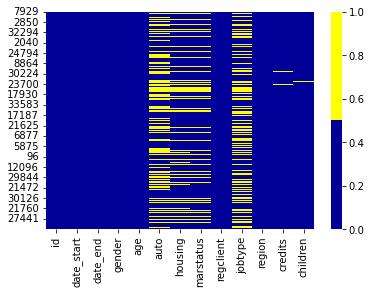

In [18]:
import seaborn as sns
cols = X_train.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(X_train[cols]=='Пропуск поля', cmap=sns.color_palette(colours))

In [19]:
X_train_4_Nan = X_train[(X_train['auto']=='Пропуск поля') & (X_train['housing']=='Пропуск поля') & (X_train['marstatus']=='Пропуск поля') & (X_train['jobtype']=='Пропуск поля')]

In [20]:
X_train_4_Nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4479 entries, 27978 to 19542
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4479 non-null   int64 
 1   date_start  4479 non-null   object
 2   date_end    4479 non-null   object
 3   gender      4479 non-null   object
 4   age         4479 non-null   int64 
 5   auto        4479 non-null   object
 6   housing     4479 non-null   object
 7   marstatus   4479 non-null   object
 8   regclient   4479 non-null   object
 9   jobtype     4479 non-null   object
 10  region      4479 non-null   object
 11  credits     4479 non-null   object
 12  children    4479 non-null   object
dtypes: int64(2), object(11)
memory usage: 489.9+ KB


**Удаляем строки, в которых 4 колонки имееют значение "Пропуск поля"**

In [21]:
X_train.drop(X_train[(X_train['auto']=='Пропуск поля') & (X_train['housing']=='Пропуск поля') & (X_train['marstatus']=='Пропуск поля') & (X_train['jobtype']=='Пропуск поля')].index, inplace = True)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20169 entries, 7929 to 9748
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20169 non-null  int64 
 1   date_start  20169 non-null  object
 2   date_end    20169 non-null  object
 3   gender      20169 non-null  object
 4   age         20169 non-null  int64 
 5   auto        20169 non-null  object
 6   housing     20169 non-null  object
 7   marstatus   20169 non-null  object
 8   regclient   20169 non-null  object
 9   jobtype     20169 non-null  object
 10  region      20169 non-null  object
 11  credits     20169 non-null  object
 12  children    20169 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.2+ MB


In [23]:
X_train.groupby("jobtype")["id"].count().sort_values()

jobtype
Неофициальное      812
Пропуск поля      5662
Официальное      13695
Name: id, dtype: int64

**Удаляем колонку 'jobtype', т.к. 48% данных неизвестны**

In [24]:
X_train = X_train.drop(['jobtype'], axis=1)

In [25]:
X_test = X_test.drop(['jobtype'], axis=1)

In [26]:
X_train.columns

Index(['id', 'date_start', 'date_end', 'gender', 'age', 'auto', 'housing',
       'marstatus', 'regclient', 'region', 'credits', 'children'],
      dtype='object')

In [27]:
X_train.groupby("auto")["id"].count().sort_values()

auto
Да               2583
Пропуск поля     5309
Нет             12277
Name: id, dtype: int64

**Учитывая 25% пропусков в колонке 'auto', исходим из худших финансовых гарантий и меняем значение 'Пропуск поля' на 'Нет'**

In [28]:
X_train["auto"] = X_train["auto"].replace("Пропуск поля", "Нет", regex=True)

In [29]:
X_test["auto"] = X_test["auto"].replace("Пропуск поля", "Нет", regex=True)

**Исходим из худших финансовых гарантий и меняем значение колонки "housing" с 'Пропуск поля' на 'Арендуемое'**

In [30]:
X_train["housing"] = X_train["housing"].replace("Пропуск поля", "Арендуемое", regex=True)

In [31]:
X_test["housing"] = X_test["housing"].replace("Пропуск поля", "Арендуемое", regex=True)

In [32]:
X_train.loc[df["children"] == "Да", "marstatus"] = "Гражданский брак/женат/замужем"

In [33]:
X_train["marstatus"] = X_train["marstatus"].replace("Пропуск поля", "Разведен", regex=True)

In [34]:
X_test["marstatus"] = X_test["marstatus"].replace("Пропуск поля", "Разведен", regex=True)

In [35]:
X_train["credits"] = X_train["credits"].replace("Пропуск поля", "Да", regex=True)

In [36]:
X_test["credits"] = X_test["credits"].replace("Пропуск поля", "Да", regex=True)

In [37]:
X_train["children"] = X_train["children"].replace("Пропуск поля", "Да", regex=True)

In [38]:
X_test["children"] = X_test["children"].replace("Пропуск поля", "Да", regex=True)

In [39]:
X_train["credits"] = X_train["credits"].replace("Да", 1 , regex=True)
X_train["credits"] = X_train["credits"].replace("Нет", 0 , regex=True)

In [40]:
X_test["credits"] = X_test["credits"].replace("Да", 1 , regex=True)
X_test["credits"] = X_test["credits"].replace("Нет", 0 , regex=True)

In [41]:
X_train["regclient"] = X_train["regclient"].replace("Нет", 0 , regex=True)
X_train["regclient"] = X_train["regclient"].replace("Да", 1 , regex=True)

In [42]:
X_test["regclient"] = X_test["regclient"].replace("Нет", 0 , regex=True)
X_test["regclient"] = X_test["regclient"].replace("Да", 1 , regex=True)

In [43]:
X_train["auto"] = X_train["auto"].replace("Нет", 0 , regex=True)
X_train["auto"] = X_train["auto"].replace("Да", 1 , regex=True)

In [44]:
X_test["auto"] = X_test["auto"].replace("Нет", 0 , regex=True)
X_test["auto"] = X_test["auto"].replace("Да", 1 , regex=True)

In [45]:
X_train["children"] = X_train["children"].replace("Нет", 0 , regex=True)
X_train["children"] = X_train["children"].replace("Да", 1 , regex=True)

In [46]:
X_test["children"] = X_test["children"].replace("Нет", 0 , regex=True)
X_test["children"] = X_test["children"].replace("Да", 1 , regex=True)

In [47]:
X_train.head(5)

,id,date_start,date_end,gender,age,auto,housing,marstatus,regclient,region,credits,children
7929,7930,06-May-2013,20-May-2013,Мужской,27,0,Собственное,Разведен,0,Кемеровская область юг,1,1
8016,8017,07-May-2013,05-Jun-2013,Женский,21,0,Собственное,Холост,0,Алтайский край,0,0
29404,29405,04-Dec-2013,18-Dec-2013,Мужской,27,0,Долевая собственность,Гражданский брак/женат/замужем,1,Кемеровская область юг,1,0
29339,29340,04-Dec-2013,13-Dec-2013,Женский,57,0,Муниципальное,Холост,1,Новосибирская область,1,0
9963,9964,29-May-2013,12-Jun-2013,Мужской,40,0,Собственное,Гражданский брак/женат/замужем,0,Алтайский край,0,0


# Удалить дубликаты

In [48]:
column_names = ['date_start', 'date_end', 'gender', 'age', 'auto', 'marstatus', 'housing', 'region', 'regclient', 'credits']

In [49]:
duplicates = X_train.duplicated(subset=column_names, keep=False)

In [50]:
X_train[duplicates].sort_values(by='id')

,id,date_start,date_end,gender,age,auto,housing,marstatus,regclient,region,credits,children
1857,1858,13-Feb-2013,27-Feb-2013,Мужской,23,0,Живут с родителями,Холост,0,Кемеровская область юг,0,0
1895,1896,13-Feb-2013,27-Feb-2013,Мужской,23,0,Живут с родителями,Холост,0,Кемеровская область юг,0,0
2675,2676,28-Feb-2013,14-Mar-2013,Мужской,26,1,Собственное,Гражданский брак/женат/замужем,0,Кемеровская область юг,1,1
2709,2710,28-Feb-2013,14-Mar-2013,Мужской,26,1,Собственное,Гражданский брак/женат/замужем,0,Кемеровская область юг,1,1
2730,2731,01-Mar-2013,15-Mar-2013,Мужской,26,1,Собственное,Гражданский брак/женат/замужем,0,Кемеровская область юг,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34697,34698,30-Dec-2013,13-Jan-2014,Женский,35,0,Собственное,Гражданский брак/женат/замужем,1,Кемеровская область север,1,1
34793,34794,31-Dec-2013,14-Jan-2014,Мужской,38,0,Собственное,Гражданский брак/женат/замужем,0,Кемеровская область юг,0,1
34816,34817,31-Dec-2013,14-Jan-2014,Мужской,38,0,Собственное,Гражданский брак/женат/замужем,0,Кемеровская область юг,0,1
35075,35076,03-Jan-2014,17-Jan-2014,Женский,35,0,Собственное,Гражданский брак/женат/замужем,1,Кемеровская область север,0,1


In [51]:
X_train.drop_duplicates(subset=column_names, keep=False, inplace=True)

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19998 entries, 7929 to 9748
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          19998 non-null  int64 
 1   date_start  19998 non-null  object
 2   date_end    19998 non-null  object
 3   gender      19998 non-null  object
 4   age         19998 non-null  int64 
 5   auto        19998 non-null  int64 
 6   housing     19998 non-null  object
 7   marstatus   19998 non-null  object
 8   regclient   19998 non-null  int64 
 9   region      19998 non-null  object
 10  credits     19998 non-null  int64 
 11  children    19998 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.0+ MB


# Проанализировать выбросы

<AxesSubplot:>

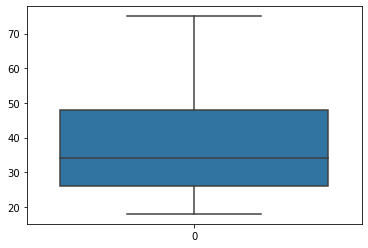

In [53]:
sns.boxplot(data=X_train['age'], width=0.8)

**Выбросов нет**

# Cоздать/ удалить переменные

In [54]:
import datetime as dt

In [55]:
X_train['date_start'] = pd.to_datetime(X_train['date_start']).dt.date

In [56]:
X_test['date_start'] = pd.to_datetime(X_test['date_start']).dt.date

In [57]:
X_train['date_end'] = pd.to_datetime(X_train['date_end']).dt.date

In [58]:
X_test['date_end'] = pd.to_datetime(X_test['date_end']).dt.date

In [59]:
X_train['delta'] = (X_train['date_end'] - X_train['date_start']).dt.days

In [60]:
X_test['delta'] = (X_test['date_end'] - X_test['date_start']).dt.days

In [61]:
X_train = X_train.drop(['date_start'], axis=1)

In [62]:
X_test = X_test.drop(['date_start'], axis=1)

In [63]:
X_train = X_train.drop(['date_end'], axis=1)

In [64]:
X_test = X_test.drop(['date_end'], axis=1)

In [65]:
X_train

,id,gender,age,auto,housing,marstatus,regclient,region,credits,children,delta
7929,7930,Мужской,27,0,Собственное,Разведен,0,Кемеровская область юг,1,1,14
8016,8017,Женский,21,0,Собственное,Холост,0,Алтайский край,0,0,29
29404,29405,Мужской,27,0,Долевая собственность,Гражданский брак/женат/замужем,1,Кемеровская область юг,1,0,14
29339,29340,Женский,57,0,Муниципальное,Холост,1,Новосибирская область,1,0,9
9963,9964,Мужской,40,0,Собственное,Гражданский брак/женат/замужем,0,Алтайский край,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...
26418,26419,Мужской,23,1,Живут с родителями,Холост,0,Красноярский край,1,0,14
27807,27808,Женский,40,0,Собственное,Гражданский брак/женат/замужем,1,Алтайский край,1,1,14
1216,1217,Женский,38,0,Собственное,Гражданский брак/женат/замужем,0,Кемеровская область север,1,1,14
11556,11557,Мужской,65,1,Собственное,Вдова/вдовец,1,Алтайский край,0,0,29


In [66]:
X_test

,id,gender,age,auto,housing,marstatus,regclient,region,credits,children,delta
5698,5699,Мужской,26,0,Арендуемое,Разведен,0,Алтайский край,1,1,14
15183,15184,Женский,34,0,Арендуемое,Разведен,1,Новосибирская область,1,1,14
7405,7406,Мужской,47,0,Собственное,Гражданский брак/женат/замужем,0,Кемеровская область север,0,0,9
29262,29263,Женский,60,0,Собственное,Холост,1,Красноярский край,1,0,29
17804,17805,Мужской,27,0,Арендуемое,Гражданский брак/женат/замужем,1,Новосибирская область,0,1,14
...,...,...,...,...,...,...,...,...,...,...,...
14745,14746,Женский,27,0,Собственное,Холост,1,Алтайский край,1,0,14
13672,13673,Мужской,31,0,Арендуемое,Разведен,1,Кемеровская область север,0,1,14
15581,15582,Женский,30,0,Арендуемое,Разведен,1,Кемеровская область юг,0,1,14
8023,8024,Женский,24,0,Собственное,Холост,0,Алтайский край,1,0,14


In [67]:
X_test.groupby("housing")["id"].count().sort_values()

housing
Муниципальное             400
Долевая собственность     875
Живут с родителями        941
Арендуемое               2906
Собственное              5442
Name: id, dtype: int64

In [68]:
X_test.groupby("marstatus")["id"].count().sort_values()

marstatus
Вдова/вдовец                       561
Холост                            2656
Разведен                          3144
Гражданский брак/женат/замужем    4203
Name: id, dtype: int64

# Закодировать категориальные переменные

In [69]:
X_train = pd.get_dummies(X_train
               ,columns = ['gender']
               ,prefix = 'gender'
               )

In [70]:
X_test = pd.get_dummies(X_test
               ,columns = ['gender']
               ,prefix = 'gender'
               )

In [71]:
X_train = pd.get_dummies(X_train
               ,columns = ['housing']
               ,prefix = 'housing'
               )

In [72]:
X_test = pd.get_dummies(X_test
               ,columns = ['housing']
               ,prefix = 'housing'
               )

In [73]:
X_train = pd.get_dummies(X_train
               ,columns = ['region']
               ,prefix = 'region'
               )

In [74]:
X_test = pd.get_dummies(X_test
               ,columns = ['region']
               ,prefix = 'region'
               )

In [75]:
X_train = pd.get_dummies(X_train
               ,columns = ['marstatus']
               ,prefix = 'marstatus'
               )

In [76]:
X_test = pd.get_dummies(X_test
               ,columns = ['marstatus']
               ,prefix = 'marstatus'
               )

# 3. Построить модель и оценить ее качество

In [78]:
y_train.to_frame()

,delinq60plus
7929,Да
27978,Нет
8016,Да
29404,Нет
29339,Нет
...,...
26418,Нет
27807,Нет
1216,Нет
11556,Да


In [79]:
df = pd.merge(X_train, y_train, left_index=True, right_index=True)

In [80]:
df.shape

(19998, 24)

In [81]:
y_train = df['delinq60plus']

In [82]:
y_train

7929      Да
8016      Да
29404    Нет
29339    Нет
9963      Да
        ... 
26418    Нет
27807    Нет
1216     Нет
11556     Да
9748      Да
Name: delinq60plus, Length: 19998, dtype: object

## Скалировать данные

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

train_X_scaled = scaler.fit_transform(X_train)
test_X_scaled = scaler.fit_transform(X_test)

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score (X_test, y_test)

0.7440363498674745

In [87]:
y_pred = rfc.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8334353041904867